# Exercise 5: Clustering
--------------------
In this exercise, we will cover the topic of unsupervised learning and clustering. The data set to use contains customer data of a shopping mall. It was taken from Kaggle: [Link to Mall customer data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).

The customer data set is made up of 200 instances where each instance describes one specific customer of the mall. You have access to information about
- the customer ID
- the gender
- the age
- the annual income in k$
- and the spending score of the customers
The spending score is assigned to the customers by the mall owner and is based on former purchasing data and customer behavior. A high spending score means that the customer spends a lot of money in the mall.

The goal of this exercise is to analyze and understand the customer behavior. To enable customer-specific marketing, the customers shall be grouped and a separate marketing strategy developed for each group. Your task will be to perform the grouping of the customers with the help of clustering algorithms.



------------------------------
## Task 1: Analyze Data

Load the mall customer data set into a *pandas* data frame. Analyze the given features and plot their statistical distributions. What conclusions can you draw from the analysis?

In [1]:
import pandas as pd

data = pd.read_csv('data/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Exploratory Data Analysis

print(data.info())

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\schmidt\AppData\Local\Temp\ipykernel_35252\1230374791.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


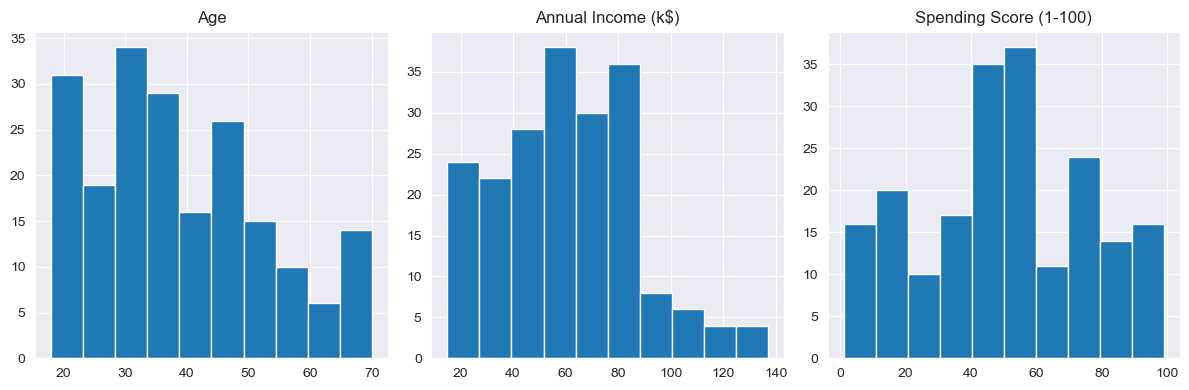

In [3]:
# histograms

import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,4])
feature_number = 1
for param in data.columns[2:5]:
    sbp = plt.subplot(1,3,feature_number)
    data[param].hist()
    sbp.set_title(param)
    plt.tight_layout()
    feature_number+=1

plt.show()

In [4]:
# gender analysis

gender = data['Gender'].value_counts()

print(gender)

Gender
Female    112
Male       88
Name: count, dtype: int64


The customer ID feature is only a numbering of customers and has no information that would be needed for clustering. The four other features are more interesting. The spending score reaches from 1 to 100 and is symmetrically distributed with a mean value of approximately 50. The age ranges from 18 to 70 with 50 % of the customers being below 36 years old. Therefore, the majority of the customers is rather young. The annual income also has a wide spread, but the histogram shows that most of the customers have a rather low or medium income. High incomes are comparatively rare.

All three numeric features are in approximately the same range. Therefore, a scaling of the attributes might not be necessary.

Moreover, there is the categorical gender feature. According to this feature, there are slightly more female than male customers.

## Task 2: Hierarchical clustering - Dendrogram

Now, we want to use the three features "Age", "Annual Income" and "Spending Score" to perform an agglomerative hierarchical clustering of the customers. Use the hierarchical clustering functions from *scipy* to plot a dendrogram of the clustering. Hint: You can use the *linkage* and *dendrogram* functions from the mentioned library.

Based on the dendrogram, what seems to be a good number of clusters that you can group the customers to?

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# calculate the linkage of the dataset. We use complete linkage, but a different choice could be made.
Z = linkage(X, method='complete', metric='euclidean')

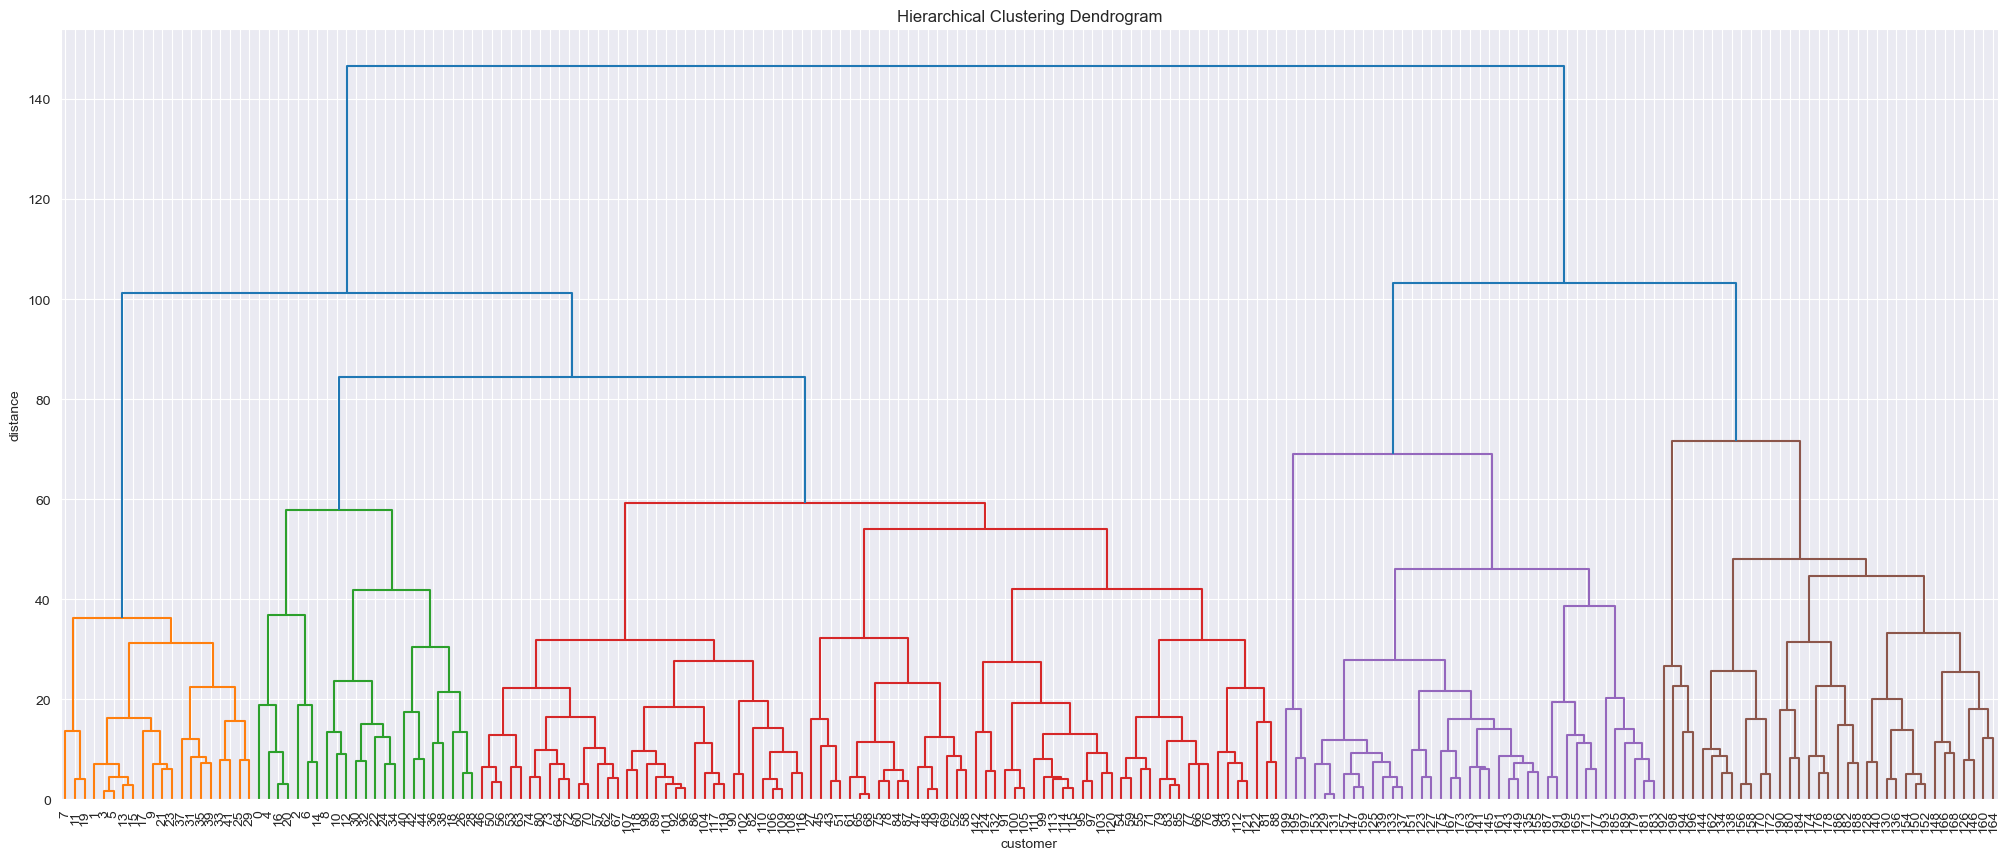

In [6]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('customer')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90,  # rotates the x axis labels
    leaf_font_size=10,  # font size for the x axis labels
    color_threshold=80
)
plt.show()

The dendrogram shows the agglomerative clustering on the data. On the x-axis, one sees all the initial clusters, each consisting of exactly one customer. The customers then get merged into bigger clusters with the y-axis indicating the distance of the successively merged clusters. In this case, the complete link, that means the maximum distance between two elements, was used to calculate the distances between clusters. The result of the clustering would of course be different when using a different linkage method. We decided to use the complete link to ensure that maximum distance of points within one clusters remains rather low.

The interesting question now is where the clustering should be stopped. From looking at the dendrogram, it seems that the distances between the clusters increase quite a lot when a distance threshold of 80 is passed. Therefore, we set the threshold to 80 and get 5 remaining clusters. This is of course an arbitrary choice and could be set different by you.

## Task 3: Analysis of hierarchical clustering

Now, use the *fcluster* function from *scipy* to assign the customers to the clusters that you defined using the dendrogram. Analyse the clusters: can you explain how the clusters differ from each other and what these differences could imply for possible marketing strategies?

In [7]:
# hierarchical clustering (agglomerative)

from scipy.cluster.hierarchy import fcluster

# we decided to use 5 clusters
clustering = fcluster(Z, 5, criterion='maxclust')

print(clustering)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 5 4 5 4 5 4 3 4 5 4 5 4 5 4 5 4 3 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4]


C:\Users\schmidt\AppData\Local\Temp\ipykernel_35252\3245617165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clustering


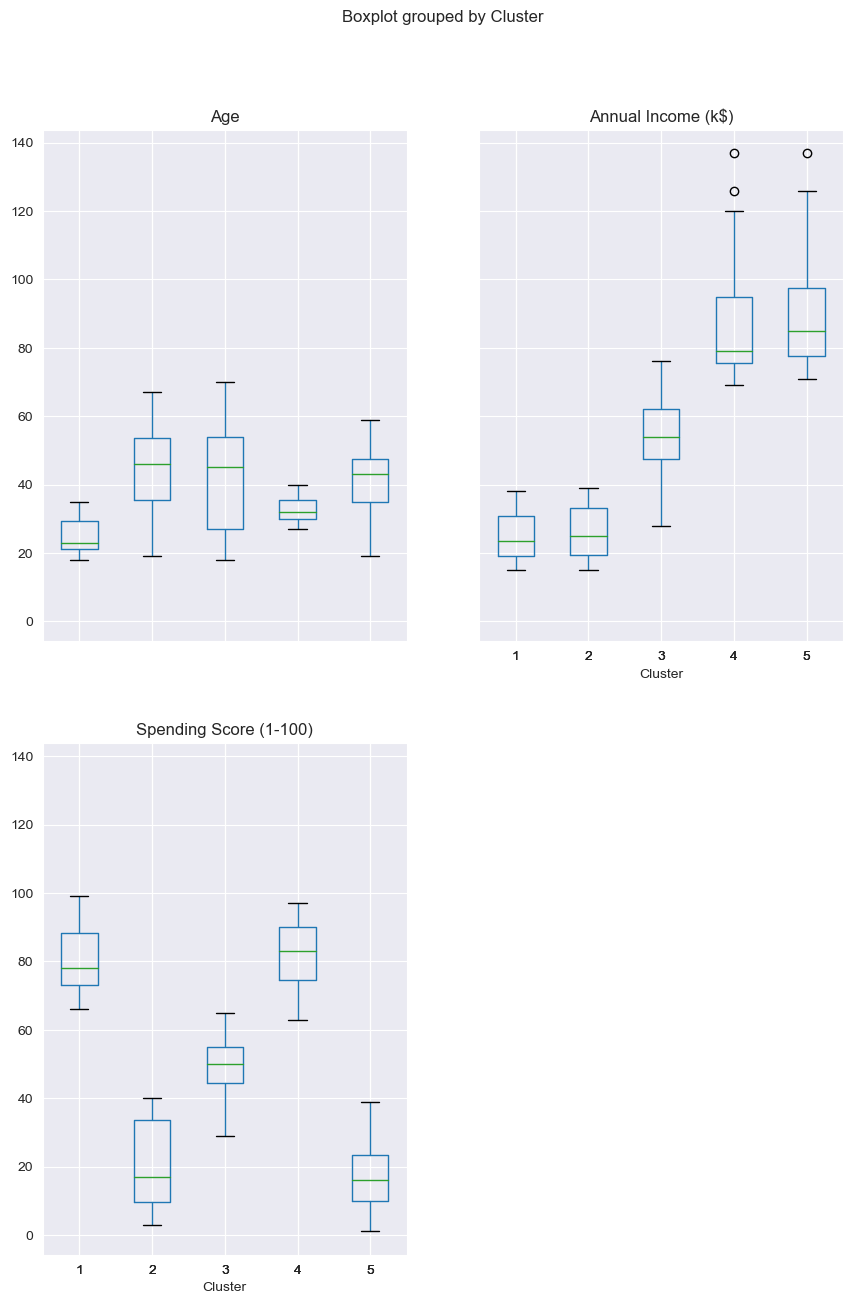

In [8]:
# append cluster labels to the pandas data frame
X['Cluster'] = clustering

# boxplots grouped by cluster number
X.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], by='Cluster', figsize=[10,15])
plt.show()

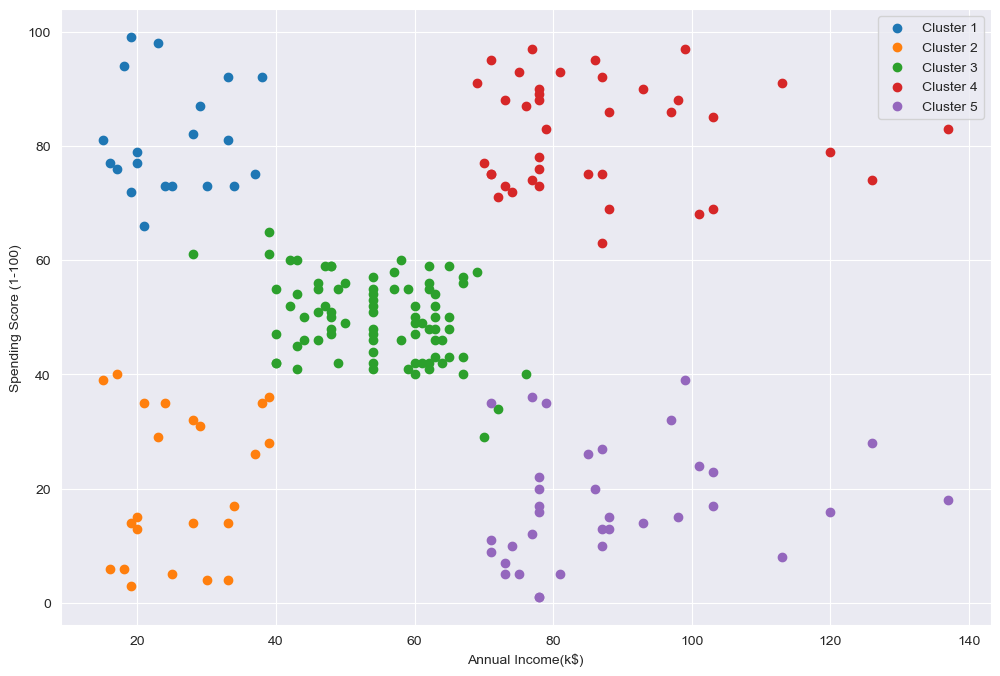

In [9]:
plt.figure(figsize = (12, 8))

for i in range(0,5):
    X_i = X[X['Cluster'] == i+1]

    plt.scatter(X_i['Annual Income (k$)'], X_i['Spending Score (1-100)'], label = 'Cluster {}'.format(i+1))

plt.legend()
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

The analysis shows that the clusters do not differ that much in age. A plot of the annual income and the spending score is almost sufficient to distinguish between the groups.

Cluster 1: Customers with low annual income, but high spending score. They are all of a rather young age. From a marketing perspective, it might be interesting to further invest into marketing for this group, as they are already good customers and their income might increase with increasing age.

Cluster 2: Customers with low annual income and low spending score. The age varies over the whole range from young to old. These customers do not yet spend much money in the mall, but a reason for this might be that they cannot afford to spend more due to their rather low annual income.

Cluster 3: Customers with medium income and medium spending score. The age varies over the whole range from young to old.

Cluster 4: Customers with high annual income and high spending score. They are all of medium age, there are neither young people nor old people in this group.

Cluster 5: Customers with high annual income and low spending score. Their age varies over the whole range from young to old. This customer group might be also interesting for marketing purposes, as they have potentially a lot of money that they might spend in the mall.



## Task 4: k-means-Clustering

In a next step, you want to perform a clustering using the k-means algorithm and compare the results to those of the hierarchical clustering.

a) Import the *k-means* algorithm from *scikit-learn* and run the algorithm with different numbers of clusters. Plot the inertias of the different runs and use the elbow-method to determine the optimal number of clusters.

C:\Users\schmidt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\schmidt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\schmidt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\schmidt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

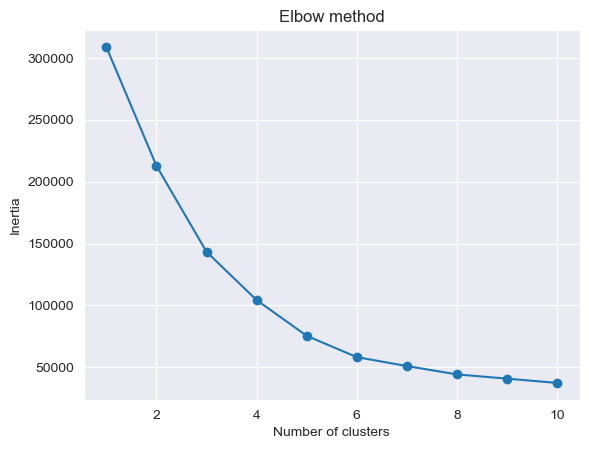

In [10]:
from sklearn.cluster import KMeans

X_kmeans = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X_kmeans)
    inertias.append(kmeans.inertia_)

# plot inertias
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In this case, a clear elbow is difficult to detect. As for the hierarchical clustering, we choose the number of clusters to be 5, since the decrease in inertia for higher cluster numbers is rather low.

b) Analyze the results of the k-means algorithm for the chosen number of clusters and compare the results to those of the hierarchical clustering.

C:\Users\schmidt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\schmidt\AppData\Local\Temp\ipykernel_35252\410116314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kmeans['Cluster'] = clusters


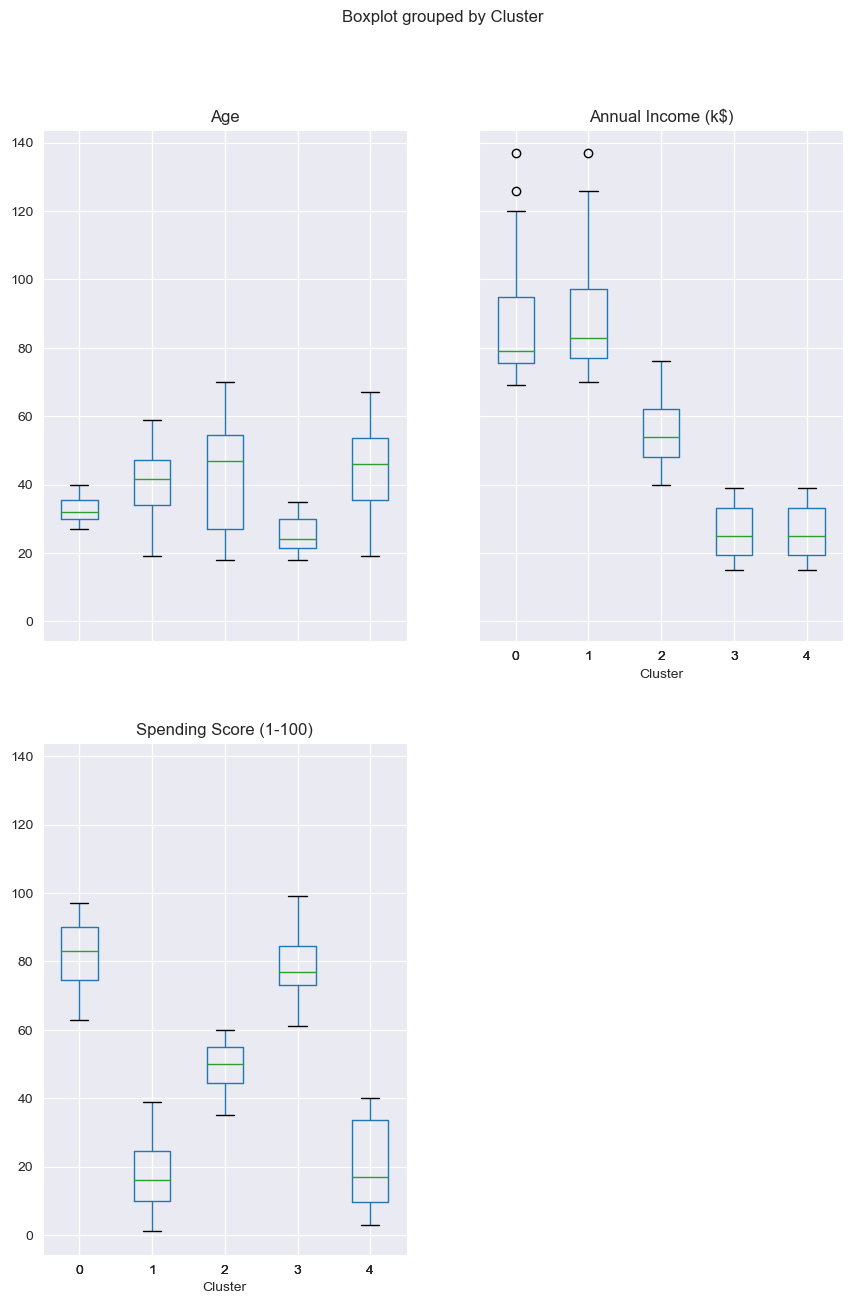

In [11]:
# choose n_clusters = 5
kmeans = KMeans(n_clusters=5, n_init=10)
clusters = kmeans.fit_predict(X_kmeans)

# append cluster labels to the pandas data frame
X_kmeans['Cluster'] = clusters

# boxplots grouped by cluster number
X_kmeans.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], by='Cluster', figsize=[10,15])
plt.show()

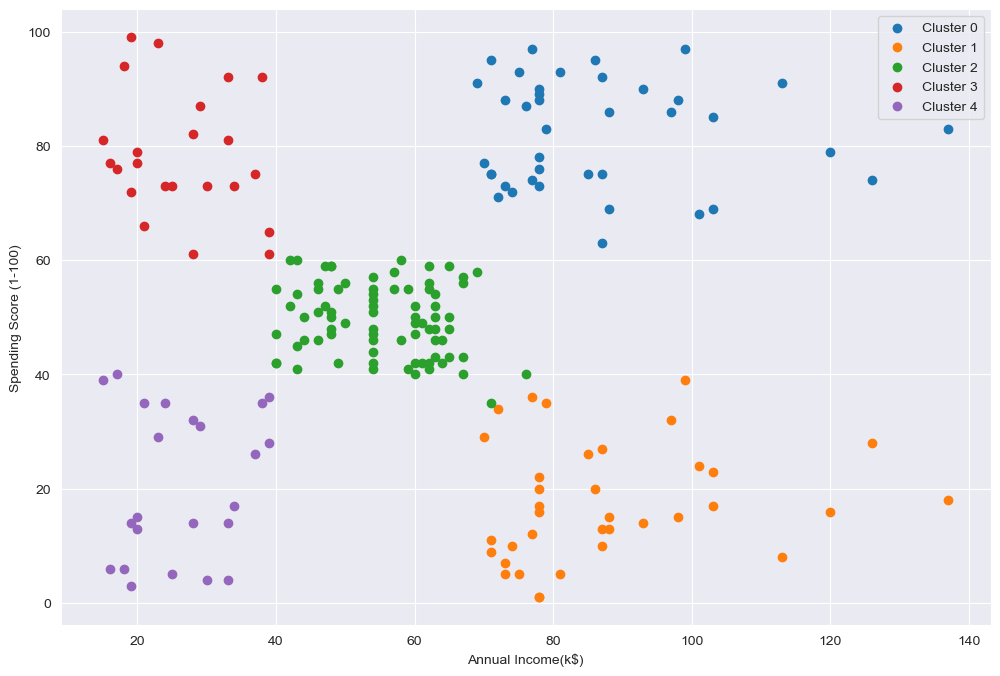

In [12]:
plt.figure(figsize = (12, 8))

for i in range(0,5):
    X_i = X_kmeans[X_kmeans['Cluster'] == i]

    plt.scatter(X_i['Annual Income (k$)'], X_i['Spending Score (1-100)'], label = 'Cluster {}'.format(i))

plt.legend()
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

The box plots of the k-means clustering look similar to those of the hierarchical clustering. In plot of spending score and annual income, only a handful of data points is classified differently compared to the hierarchical clustering. This concerns only the differentiation between the k-means classes 2 and 1, as well as the k-means classes 2 and 0. Cluster 3 and 4 seem identical to the respective clusters from the hierarchical clustering.

In conclusion, the result of a clustering always depends on the chosen method and different methods can lead to slightly different results. However, the results of the two compared methods are very similar and thus seem to be valid.